# **Đề tài: Sử dụng các mô hình học máy để dự đoán khả năng chấp nhận khoản vay của khách hàng**

**Giảng viên hướng dẫn:** Cô Lê Hằng Anh

**Nhóm sinh viên thực hiện:** Hồ Thị Minh Hằng, Trần Đức Lương, Phạm Thị Ngọc Tú, Nguyễn Ngọc Bắc

### **Tóm tắt: Dự đoán khả năng chấp nhận khoản vay bằng mô hình học máy**  

Trong bối cảnh các ngân hàng dựa vào khoản vay để tạo lợi nhuận, quản lý rủi ro tín dụng là một thách thức lớn. Phương pháp truyền thống thẩm định khách hàng (dựa trên lịch sử tín dụng, thu nhập, chi tiêu, tài sản) thường tốn thời gian, chi phí cao và khó đáp ứng khối lượng đơn xin vay lớn.  

Mô hình học máy mang lại giải pháp tự động hóa và nâng cao hiệu quả thẩm định thông qua phân tích dữ liệu lịch sử khách hàng. Các thuật toán như hồi quy logistic, cây quyết định, rừng ngẫu nhiên và mạng nơ-ron giúp xác định:  
1. Mức độ rủi ro của người vay.  
2. Quyết định cấp vay dựa trên rủi ro.  

Mục tiêu chính của nghiên cứu:  
- Xây dựng và tối ưu mô hình học máy để dự đoán khả năng trả nợ.  
- Đánh giá hiệu suất qua các chỉ số như độ chính xác và AUC-ROC.  
- Xác định yếu tố ảnh hưởng chính (tình trạng hôn nhân, thu nhập, lịch sử tín dụng).  
- Đề xuất giải pháp ứng dụng mô hình vào thực tiễn.  

### **Ý nghĩa:**  
- Giảm rủi ro tài chính và tối ưu lợi nhuận.  
- Tăng tốc độ và độ chính xác của quyết định tín dụng.  
- Cải thiện trải nghiệm khách hàng.  
- Mở rộng ứng dụng học máy trong tài chính ngân hàng, như phát hiện gian lận hoặc quản lý rủi ro.  

Cách tiếp cận này giúp ngân hàng vận hành hiệu quả hơn, giảm tổn thất và xây dựng lòng tin với khách hàng.  

# **THỰC NGHIỆM**

# **3.1.Giới thiệu về bộ dữ liệu dự đoán khả năng chấp nhận khoản vay**

Việc lựa chọn bộ dữ liệu phù hợp đóng vai trò then chốt trong đánh giá và triển khai các mô hình học máy. Trong bối cảnh tài chính – ngân hàng, bài toán dự đoán khả năng phê duyệt khoản vay không chỉ mang tính ứng dụng cao mà còn phản ánh nhiều yếu tố phức tạp liên quan đến khách hàng và điều kiện vay. Phân tích bài toán này sẽ giúp kiểm chứng hiệu quả của mô hình và khả năng giải thích trong các tình huống thực tế.

### **3.1.1.Nguồn gốc và đặc điểm bộ dữ liệu**


Bộ dữ liệu **Loan Approval Prediction** được lấy từ nền tảng **Kaggle** – một kho lưu trữ dữ liệu phổ biến trong cộng đồng khoa học dữ liệu. Dữ liệu bao gồm 598 quan sát tương ứng với các khoản vay cá nhân thực tế, được mô tả thông qua 13 đặc trưng đầu vào cùng biến mục tiêu Loan_Status (Y: được duyệt, N: không được duyệt). Đây là bài toán phân loại nhị phân, phản ánh bài toán ra quyết định trong môi trường tài chính, nơi các yếu tố nhân khẩu học, kinh tế và lịch sử tín dụng ảnh hưởng trực tiếp đến khả năng được cấp vay.


### **3.1.2.Mô tả các biến trong bộ dữ liệu**

In [ ]:
# Kiểm tra Loan_ID có bị trùng hay không
duplicate_loan_ids = df['Loan_ID'].duplicated().sum()

if duplicate_loan_ids > 0:
    print(f"Có {duplicate_loan_ids} giá trị trùng lặp trong cột Loan_ID.")
else:
    print("Không có giá trị trùng lặp trong cột Loan_ID.")


Không có giá trị trùng lặp trong cột Loan_ID.


In [ ]:
# Đếm số lượng cho từng giá trị
accepted_count = df[df['Loan_Status'] == 'Y'].shape[0]
rejected_count = df[df['Loan_Status'] == 'N'].shape[0]

print(f"Số lượng khoản vay được chấp nhận (Y): {accepted_count}")
print(f"Số lượng khoản vay không được chấp nhận (N): {rejected_count}")


Số lượng khoản vay được chấp nhận (Y): 411
Số lượng khoản vay không được chấp nhận (N): 187



- **Tỷ lệ chấp nhận khoản vay:**  
  - Chấp nhận (Y): 68.73%.  
  - Không chấp nhận (N): 31.27%.  
  - **Nhận xét:** Ngân hàng có xu hướng hỗ trợ các ứng viên đủ điều kiện, nhưng 31% bị từ chối cho thấy rủi ro tín dụng vẫn được kiểm soát chặt chẽ.  

- **Dữ liệu bị thiếu:**  
  - **Dependents:** 12.  
  - **LoanAmount:** 21.  
  - **Loan_Amount_Term:** 14.  
  - **Credit_History:** 49.  
  - **Nhận xét:** Lịch sử tín dụng (Credit_History) thiếu nhiều nhất, có thể ảnh hưởng lớn đến độ chính xác của mô hình. Cần xử lý các giá trị thiếu cẩn thận.  

- **Dữ liệu nhiễu:**  
  - Không có giá trị âm ở các cột tài chính, đảm bảo chất lượng tốt để phân tích.  

- **Thống kê mô tả (các cột tài chính):**  
  - **ApplicantIncome (Thu nhập người vay):** Trung bình 5292.25, min 150, max 81,000.  
  - **CoapplicantIncome (Thu nhập đồng vay):** Trung bình 1631.50, min 0, max 41,667.  
  - **LoanAmount (Số tiền vay):** Trung bình 144.97, min 9, max 650.  
  - **Loan_Amount_Term (Thời hạn vay):** Trung bình 341.92 tháng, max 480.  
  - **Nhận xét:** Thu nhập và số tiền vay có sự phân bố rộng, cho thấy ngân hàng phục vụ nhiều đối tượng khách hàng khác nhau với nhu cầu tài chính đa dạng.  


Sự chênh lệch lớn giữa giá trị min (150) và max (81000), cho thấy có thể tồn tại các ngoại lệ ảnh hưởng đến kết quả phân tích. Sử dụng loại bỏ ngoại lệ cho cột ApplicantIncome dựa trên phân vị 1% và 99% để xử lý

In [ ]:
# Xác định phân vị 1% và 99% cho ApplicantIncome
lower_limit = df['ApplicantIncome'].quantile(0.01)
upper_limit = df['ApplicantIncome'].quantile(0.99)

# Lọc bỏ các ngoại lệ trong ApplicantIncome
df_filtered = df[(df['ApplicantIncome'] >= lower_limit) & (df['ApplicantIncome'] <= upper_limit)]

# Kiểm tra lại thống kê mô tả sau khi loại bỏ ngoại lệ
print("Thống kê mô tả sau khi loại bỏ ngoại lệ:")
print(df_filtered[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].describe())

# Lưu dữ liệu đã xử lý vào file mới
output_file_path = '/content/LoanApprovalPrediction_filtered.csv'
df_filtered.to_csv(output_file_path, index=False)
print(f"\nDữ liệu sau khi loại bỏ ngoại lệ đã được lưu tại: {output_file_path}")

Thống kê mô tả sau khi loại bỏ ngoại lệ:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
count       587.000000         587.000000  566.000000        573.000000
mean       4884.664395        1563.539898  142.860424        342.303665
std        3356.382976        2468.459344   78.756733         64.487208
min        1025.000000           0.000000    9.000000         12.000000
25%        2891.500000           0.000000  100.000000        360.000000
50%        3800.000000        1210.000000  126.000000        360.000000
75%        5705.500000        2292.500000  165.000000        360.000000
max       20833.000000       33837.000000  650.000000        480.000000

Dữ liệu sau khi loại bỏ ngoại lệ đã được lưu tại: /content/LoanApprovalPrediction_filtered.csv


**Loại bỏ ngoại lệ bằng phân vị 1% và 99%**  

- **Ý nghĩa phân vị 1% và 99%:**  
  - **Phân vị 1%:** Loại bỏ giá trị thấp bất thường (< 1%).  
  - **Phân vị 99%:** Loại bỏ giá trị cao bất thường (> 99%).  

- **Lợi ích:**  
  - **Giảm nhiễu:** Dữ liệu tập trung vào giá trị phổ biến, giảm tác động của ngoại lệ.  
  - **Cải thiện thống kê:** Trung bình, độ lệch chuẩn chính xác hơn.  
  - **Tăng hiệu quả mô hình:** Giảm sai lệch khi huấn luyện.  

- **Ứng dụng:**  
  Phương pháp này giữ lại phần lớn dữ liệu (98%) trong khoảng trung tâm, đặc biệt hữu ích với dữ liệu tài chính hoặc kinh tế để duy trì sự cân đối và độ tin cậy của phân tích.  

**Đánh giá chất lượng bộ dữ liệu**  

- **Kích thước và độ đại diện:**  
  - **Kích thước:** Với 598 khoản vay, bộ dữ liệu đủ lớn để thực hiện phân tích và dự đoán.  
  - **Độ đại diện:** Phản ánh sự đa dạng về nhân khẩu học, tài chính, và lịch sử tín dụng, phù hợp với thực tế hoạt động tín dụng.  

- **Đặc trưng dự báo:**  
  Các đặc trưng như giới tính, tình trạng hôn nhân, thu nhập, lịch sử tín dụng đều phù hợp và có ảnh hưởng rõ ràng đến khả năng vay vốn.  

- **Chất lượng dữ liệu:**  
  - **Dữ liệu thiếu:** Một số cột như *Credit_History* thiếu giá trị nhưng có thể xử lý được.  
  - **Dữ liệu nhiễu:** Không phát hiện giá trị bất hợp lệ, đảm bảo độ tin cậy.  

- **Tính khả thi:**  
  Bộ dữ liệu đầy đủ để áp dụng các phương pháp phân tích thống kê và học máy, hỗ trợ dự đoán chính xác khả năng chấp nhận khoản vay.  

# **3.2.Tiền xử lý dữ liệu**

## **3.2.1. Xử lý giá trị thiếu**

1. Xử lý dữ liệu thiếu (nếu có)
Áp dụng kỹ thuật xóa các hàng có giá trị thiếu.
Sử dụng kỹ thuật điền giá trị phổ biến nhất cho các biến số phân loại
•  Trước khi xử lý:
•	Có một số cột có dữ liệu thiếu, bao gồm:
o	Dependents: 12 giá trị thiếu
o	LoanAmount: 21 giá trị thiếu
o	Loan_Amount_Term: 14 giá trị thiếu
o	Credit_History: 49 giá trị thiếu
•  Sau khi xử lý:
•	Tất cả các cột không còn giá trị thiếu. Điều này cho thấy rằng việc điền giá trị trung bình cho các biến số liên tục và giá trị phổ biến nhất cho các biến số phân loại đã được thực hiện thành công


Cách 1: Xóa các hàng có dữ liệu thiếu

In [ ]:
# Kiểm tra dữ liệu thiếu trước khi xử lý
print("Số lượng dữ liệu bị thiếu trước khi xử lý:")
print(df.isnull().sum())

# Cách 1: Xóa các hàng chứa dữ liệu thiếu
df_dropped = df.dropna()

# Kiểm tra dữ liệu thiếu sau khi xử lý
print("\nSố lượng dữ liệu bị thiếu sau khi xóa:")
print(df_dropped.isnull().sum())
df_dropped.to_csv('loan_data_cleaned_dropped.csv', index=False)


Số lượng dữ liệu bị thiếu trước khi xử lý:
Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

Số lượng dữ liệu bị thiếu sau khi xóa:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Cách 2: Điền dữ liệu thiếu

In [ ]:
# Cách 2: Điền dữ liệu thiếu

# Xử lý dữ liệu thiếu cho các biến số liên tục
continuous_cols = ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']

for col in continuous_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Xử lý dữ liệu thiếu cho các biến số phân loại
categorical_cols = ['Dependents', 'Credit_History', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Kiểm tra dữ liệu thiếu sau khi xử lý
print("\nSố lượng dữ liệu bị thiếu sau khi điền vào:")
print(df.isnull().sum())

# Lưu dữ liệu đã xử lý vào file mới (tuỳ chọn)
df.to_csv('loan_data_cleaned_filled.csv', index=False)



Số lượng dữ liệu bị thiếu sau khi điền vào:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-69-c8643fb358db>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-69-c8643fb358db>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

## **3.2.2. Chuẩn hóa dữ liệu**

In [ ]:
# Kiểm tra các cột hiện có
print("Các cột hiện có trong DataFrame:")
print(df.columns)

# Chuẩn hóa các biến số học về phạm vi [0, 1] thủ công
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in numeric_cols:
    if col in df.columns:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
print(df.head())

df.to_csv('loan_data_transformed.csv', index=False)


Các cột hiện có trong DataFrame:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.070489           0.000000    0.212120           0.74359   
1         0.054830           0.036192    0.185647           0.74359   
2         0.035250           0.000000    0.088924           0.74359   
3         0.030093

(Gợi ý: Chọn phương pháp chuẩn hóa cho phép mô hình đạt hiệu suất tốt nhất.
Thực hiện chuẩn hóa dữ liệu huấn luyện và kiểm tra dựa trên phương pháp đã chọn.)
Các phương pháp chuẩn hóa như min-max scaling, standardization và robust scaler.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Chọn các cột số cần chuẩn hóa (ApplicantIncome, CoapplicantIncome, LoanAmount)
cols_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)




 Min-Max Scaling
Ý tưởng: Đưa các giá trị về một phạm vi xác định, thường là từ 0 đến 1. Điều này làm cho dữ liệu nằm gọn trong một khoảng giá trị cố định và có thể giúp mô hình học máy hội tụ nhanh hơn trong quá trình tối ưu.

Ưu điểm: Đơn giản và trực quan, giúp mô hình hội tụ nhanh hơn.

Nhược điểm: Dễ bị ảnh hưởng bởi giá trị ngoại lệ, vì nếu có một giá trị rất lớn hoặc rất nhỏ, nó sẽ làm thay đổi phạm vi của toàn bộ dữ liệu.

In [ ]:

# Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled = scaler.transform(X_test[cols_to_scale])


Standardization (Z-score normalization)

Ý tưởng: Đưa các giá trị về dạng phân phối chuẩn với giá trị trung bình bằng 0 và độ lệch chuẩn là 1. Phương pháp này hữu ích khi dữ liệu có phân phối gần giống với phân phối chuẩn.

Ưu điểm: Ít bị ảnh hưởng bởi các giá trị ngoại lệ hơn so với Min-Max Scaling và phù hợp khi dữ liệu có phân phối chuẩn.

Nhược điểm: Không đảm bảo dữ liệu sẽ nằm trong một khoảng cố định.

In [ ]:
# Standardization
scaler_std = StandardScaler()
X_train_standard = scaler_std.fit_transform(X_train[cols_to_scale])
X_test_standard = scaler_std.transform(X_test[cols_to_scale])


 Robust Scaler

Ý tưởng: Sử dụng các thống kê phân vị (quartiles) thay vì giá trị trung bình và độ lệch chuẩn, giúp giảm ảnh hưởng của các giá trị ngoại lệ.

Ưu điểm: Tốt hơn Min-Max Scaling và Standardization khi dữ liệu có nhiều giá trị ngoại lệ.

Nhược điểm: Khi dữ liệu có phân phối rất hẹp, phương pháp này có thể không cải thiện đáng kể.

In [ ]:

# Robust Scaler
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train[cols_to_scale])
X_test_robust = scaler_robust.transform(X_test[cols_to_scale])


In [ ]:

# In ra các dữ liệu đã chuẩn hóa
print("Min-Max Scaled Data:\n", X_train_scaled)


Min-Max Scaled Data:
 [[0.12183055 0.03998368 0.328594  ]
 [0.1569697  0.26322989 0.52448657]
 [0.07235622 0.         0.21958926]
 ...
 [0.04753247 0.07857537 0.30015798]
 [0.08884354 0.1999904  0.24960506]
 [0.05568336 0.08599131 0.20216241]]


In [ ]:
print("Standardized Data:\n", X_train_standard)


Standardized Data:
 [[ 0.78868524  0.0254584   0.91320682]
 [ 1.2689553   3.30405611  2.35766744]
 [ 0.11248663 -0.5617426   0.10943437]
 ...
 [-0.22679602  0.59221664  0.70352705]
 [ 0.33782981  2.37531982  0.33076302]
 [-0.1153923   0.70112727 -0.01906666]]


In [ ]:
print("Robust Scaled Data:\n", X_train_robust)

Robust Scaled Data:
 [[ 2.0852292   0.25312874  1.49230769]
 [ 3.04991511  4.30231799  3.4       ]
 [ 0.72699491 -0.47208619  0.43076923]
 ...
 [ 0.04550085  0.95309609  1.21538462]
 [ 1.17962649  3.15529437  0.72307692]
 [ 0.26926995  1.08760474  0.26105853]]


Mở rộng: Áp dụng các kỹ thuật chọn lọc tính năng (Feature Selection) và xử lý giá trị thiếu (Missing Values)

1.Xử lý giá trị thiếu (Missing Values):

Nếu có giá trị thiếu trong tập dữ liệu, bạn cần xử lý chúng trước khi chuẩn hóa. Một số cách thông dụng:
Thay thế giá trị thiếu bằng giá trị trung bình, trung vị, hoặc giá trị phổ biến nhất.
Xóa các hàng hoặc cột có quá nhiều giá trị thiếu.
Sử dụng các mô hình dự đoán để thay thế giá trị thiếu.

2.Chọn lọc tính năng (Feature Selection):

Không phải tất cả các đặc trưng đều cần chuẩn hóa. Ví dụ, các biến dạng phân loại (categorical) có thể được mã hóa và không cần chuẩn hóa. Chỉ các biến dạng số cần chuẩn hóa.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Xử lý giá trị thiếu
imputer = SimpleImputer(strategy='median')  # Thay giá trị thiếu bằng trung vị
X_train[cols_to_scale] = imputer.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = imputer.transform(X_test[cols_to_scale])

# Mã hóa biến phân loại (ví dụ cột 'Gender' và 'Married')
# Remove the 'sparse' argument
encoder = OneHotEncoder(handle_unknown='ignore', drop='first')  # Mã hóa nhị phân và bỏ một cột để tránh đa cộng tuyến
encoded_train = encoder.fit_transform(X_train[['Gender', 'Married']]).toarray() # Convert to dense array
encoded_test = encoder.transform(X_test[['Gender', 'Married']]).toarray() # Convert to dense array


# Ghép lại với dữ liệu đã chuẩn hóa
import numpy as np
# Replace X_train_minmax with a suitable scaled data, like X_train_scaled
X_train_final = np.hstack((X_train_scaled, encoded_train))
X_test_final = np.hstack((X_test_scaled, encoded_test))

Trong ví dụ này:

Chúng ta đã thay thế các giá trị thiếu bằng trung vị.

Mã hóa các biến phân loại sử dụng One-Hot Encoding và chuẩn hóa dữ liệu số bằng Min-Max Scaling.

Cuối cùng, ghép dữ liệu lại thành bộ dữ liệu đầy đủ để sẵn sàng cho huấn luyện mô hình.

## **3.2.3. Loại bỏ dữ liệu ngoại lai**

Phương pháp IQR (Interquartile Range) là một kỹ thuật thống kê phổ biến để phát hiện và loại bỏ các giá trị ngoại lai (outliers) trong dữ liệu. Nó dựa trên việc đo lường độ phân tán của dữ liệu trong khoảng từ giá trị phần tư thứ nhất (Q1) đến giá trị phần tư thứ ba (Q3).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(file_path)

#  Buoc 1: Xử lý các giá trị trống
# tìm và điền vào NAN giá trị trung bình

data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# loại bỏ các
#Xóa các hàng có giá trị phân loại bị thiếu
data.dropna(inplace=True)

#  Buoc 2: xác định và loại bỏ các điểm overfit = cách sử dụng iqr
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# tính  IQR
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# loại bỏ overfitting
filtered_data = data[~((data[numeric_columns] < (Q1 - 1.5 * IQR)) |
                       (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Buoc3: Visualization
sns.set(style="whitegrid")


<ipython-input-79-50dd41c38bb7>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
<ipython-input-79-50dd41c38bb7>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

# **3.3. Trực quan hóa dữ liệu**

##Phân phối tình trạng khoản vay (Loan Status Distribution)

Biểu đồ: Đây là một biểu đồ cột (countplot) thể hiện số lượng khoản vay được phê duyệt (Y) và bị từ chối (N).
Tác dụng: Biểu đồ này giúp chúng ta hiểu rõ về tỷ lệ phê duyệt và từ chối trong tập dữ liệu, cho biết có sự mất cân bằng giữa các nhóm hay không. Nếu có sự chênh lệch lớn giữa các khoản vay được phê duyệt và bị từ chối, điều đó có thể ảnh hưởng đến việc huấn luyện mô hình dự đoán.

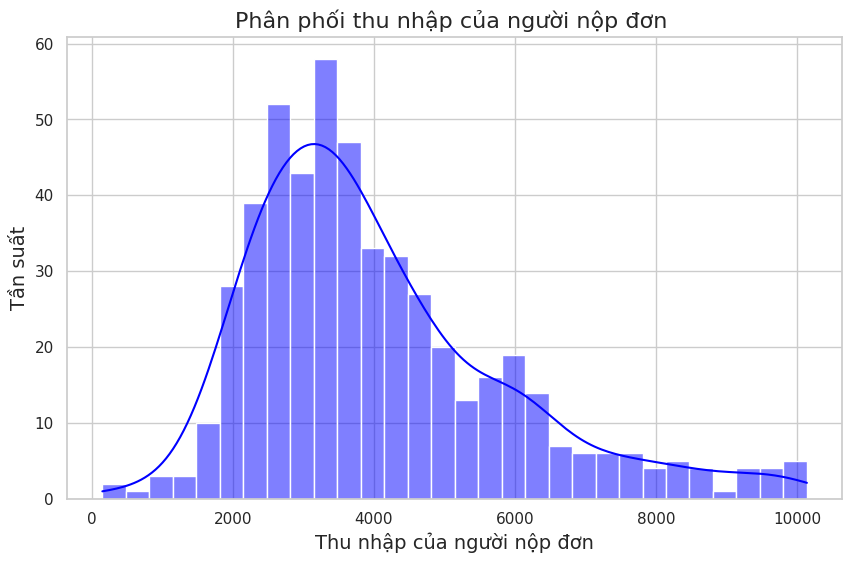

In [ ]:

# Plot 1: Biểu đồ phân phối  Applicant Income
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['ApplicantIncome'], kde=True, bins=30, color="blue")
plt.title('Phân phối thu nhập của người nộp đơn ', fontsize=16)
plt.xlabel('Thu nhập của người nộp đơn', fontsize=14)
plt.ylabel('Tần suất', fontsize=14)

plt.show()



Biểu đồ 1: Phân phối thu nhập ứng viên (Applicant Income)

Mô tả: Biểu đồ hiển thị phân phối thu nhập của ứng viên sau khi loại bỏ các điểm ngoại lai.

Nhận xét:
Phần lớn ứng viên có thu nhập nằm trong khoảng 2,000 - 10,000.

Một số ít ứng viên có thu nhập vượt ngưỡng 15,000, nhưng những giá trị này đã giảm sau khi xử lý ngoại lai.

Phân phối bị lệch phải (right-skewed), cho thấy có một số ứng viên có thu nhập rất cao, nhưng đa số vẫn thuộc nhóm thu nhập trung bình hoặc thấp.

Ý nghĩa: Các ứng viên có thu nhập cao có khả năng vay được số tiền lớn hơn, nhưng họ chỉ chiếm một phần nhỏ trong tập dữ liệu.



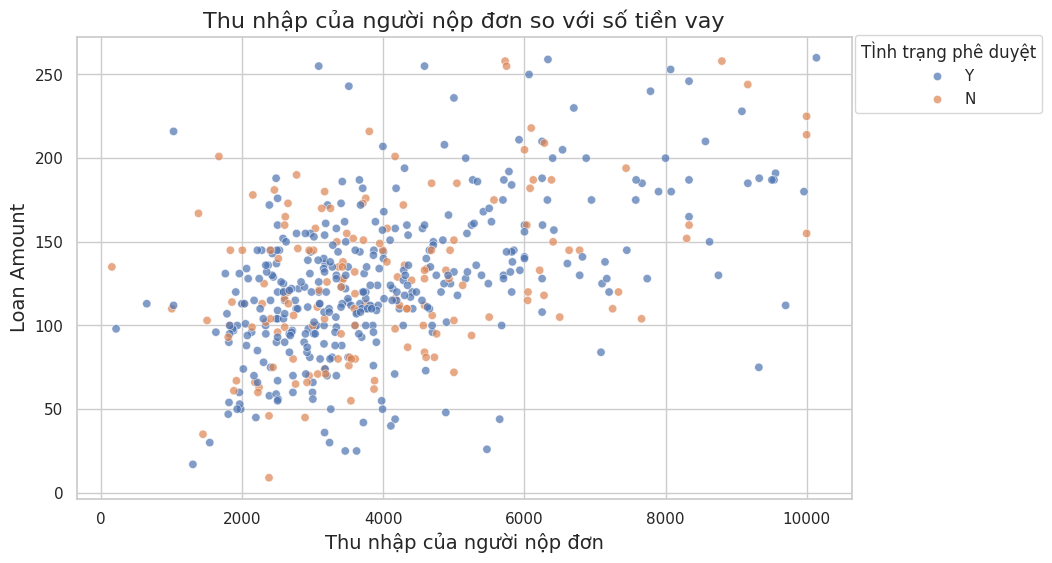

In [ ]:

# Plot 2: Biểu đồ phân tán của Applicant Income và Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', alpha=0.7)
plt.title('Thu nhập của người nộp đơn so với số tiền vay', fontsize=16)
plt.xlabel('Thu nhập của người nộp đơn', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.legend(title='TÌnh trạng phê duyệt', loc='upper right',bbox_to_anchor=(1.256,1.02))
plt.show()

Biểu đồ 2: Thu nhập ứng viên so với khoản vay (Applicant Income vs Loan Amount)

Mô tả: Biểu đồ tán xạ giữa ApplicantIncome và LoanAmount, với trạng thái phê duyệt (Loan_Status) được đánh dấu bằng màu sắc.

Nhận xét:
Các khoản vay nhỏ (LoanAmount < 200) thường có tỷ lệ phê duyệt cao hơn.

Khi thu nhập tăng, số tiền vay cũng có xu hướng tăng, nhưng không phải lúc nào khoản vay lớn cũng được phê duyệt.

Một số khoản vay bị từ chối ngay cả khi thu nhập ứng viên cao, cho thấy các yếu tố khác như lịch sử tín dụng và khu vực tài sản cũng quan trọng.

Ý nghĩa: Ngay cả với thu nhập cao, khả năng được phê duyệt phụ thuộc vào nhiều yếu tố khác.

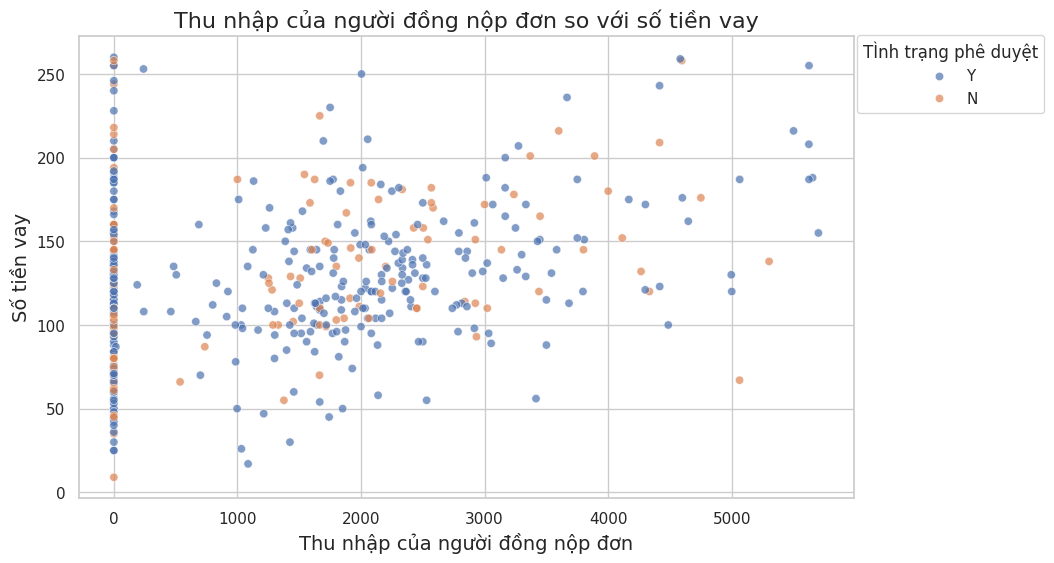

In [ ]:
# Plot 3: Loan Amount vs Coapplicant Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status', alpha=0.7)
plt.title('Thu nhập của người đồng nộp đơn so với số tiền vay', fontsize=16)
plt.xlabel('Thu nhập của người đồng nộp đơn', fontsize=14)
plt.ylabel('Số tiền vay', fontsize=14)
plt.legend(title='TÌnh trạng phê duyệt', loc='upper right',bbox_to_anchor=(1.256,1.02))
plt.show()

Biểu đồ 3: Thu nhập người cùng vay (Coapplicant Income) so với khoản vay

Mô tả: Biểu đồ tán xạ giữa CoapplicantIncome và LoanAmount, phân loại theo trạng thái phê duyệt.

Nhận xét:
Hầu hết các ứng viên có thu nhập của người cùng vay bằng 0 (không có người cùng vay), nhưng họ vẫn có tỷ lệ phê duyệt cao.

Khi CoapplicantIncome > 1,500, số tiền vay có xu hướng tăng, và khả năng được phê duyệt cũng cao hơn.

Người cùng vay có thu nhập cao là yếu tố hỗ trợ tốt để phê duyệt khoản vay.

Ý nghĩa: Việc có người cùng vay với thu nhập ổn định có thể cải thiện cơ hội phê duyệt khoản vay.

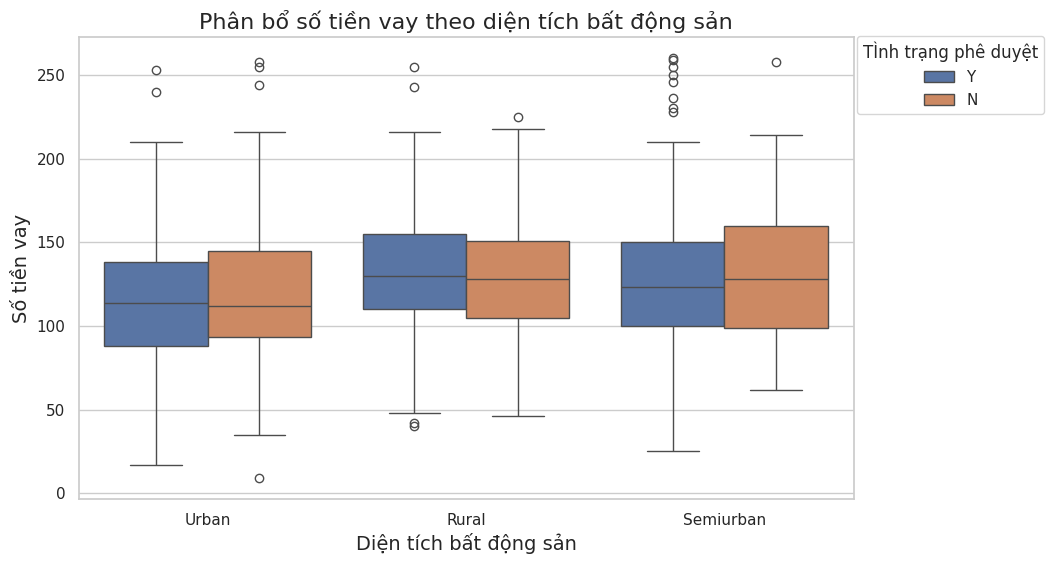

In [ ]:

# Plot 4: Loan Amount Distribution by Property Area
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Property_Area', y='LoanAmount', hue='Loan_Status')
plt.title('Phân bổ số tiền vay theo diện tích bất động sản', fontsize=16)
plt.xlabel('Diện tích bất động sản', fontsize=14)
plt.ylabel('Số tiền vay', fontsize=14)
plt.legend(title='TÌnh trạng phê duyệt', loc='upper right',bbox_to_anchor=(1.256,1.02))
plt.show()



Biểu đồ 4: Phân phối khoản vay theo khu vực tài sản (Property Area)

Mô tả: Biểu đồ boxplot cho thấy phân phối LoanAmount theo Property_Area, phân loại bởi trạng thái phê duyệt.

Nhận xét:
Urban (Thành phố): Phân phối khoản vay rộng hơn, bao gồm cả khoản vay lớn (> 200), nhưng vẫn có nhiều khoản bị từ chối.

Semiurban (Bán thành thị): Khoản vay tập trung ở mức trung bình, với tỷ lệ phê duyệt cao nhất.

Rural (Nông thôn): Khoản vay chủ yếu nhỏ (< 150), và nhiều khoản vay bị từ chối.

Ý nghĩa: Khu vực bán thành thị có tỷ lệ phê duyệt cao hơn, có thể do điều kiện kinh tế và khả năng tín dụng của người dân tại đây.

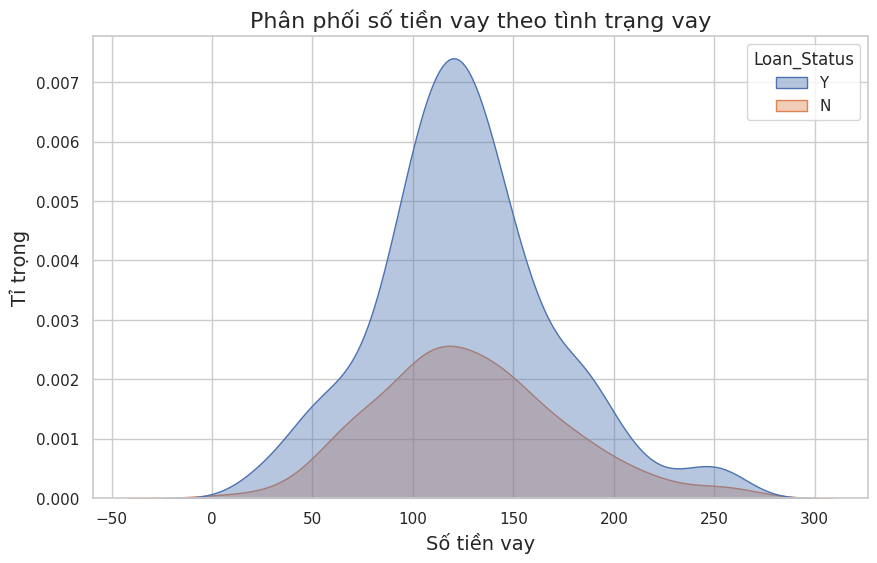

In [ ]:

# 5: Loan Amount theo Loan Status
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_data, x='LoanAmount', hue='Loan_Status', fill=True, alpha=0.4)
plt.title('Phân phối số tiền vay theo tình trạng vay', fontsize=16)
plt.xlabel('Số tiền vay', fontsize=14)
plt.ylabel('Tỉ trọng', fontsize=14)
plt.show()


Biểu đồ 5: Phân phối khoản vay theo trạng thái phê duyệt

Mô tả: Biểu đồ KDE (Kernel Density Estimation) cho thấy phân phối số tiền vay (LoanAmount) giữa hai trạng thái phê duyệt (Y) và từ chối (N).

Nhận xét:
Những khoản vay được phê duyệt (Y) thường tập trung ở mức trung bình thấp (~100-150).

Các khoản vay bị từ chối (N) phân bố rộng hơn, bao gồm cả những khoản vay cao.

Người vay số tiền lớn có khả năng cao bị từ chối.

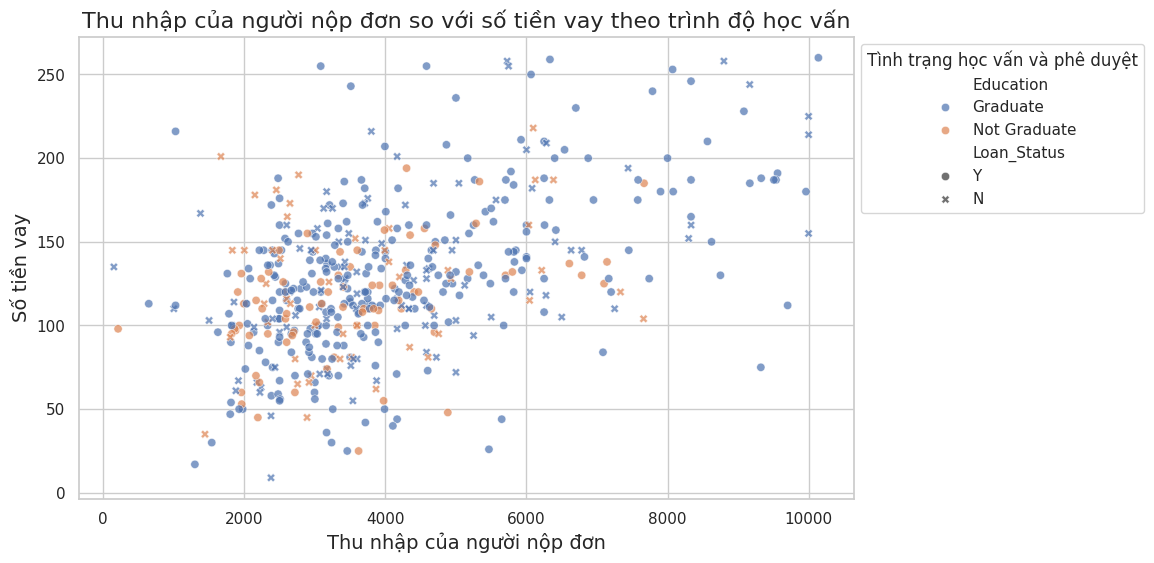

In [ ]:
# 6: Loan Amount vs Applicant Income by Education
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='ApplicantIncome', y='LoanAmount', hue='Education', style='Loan_Status', alpha=0.7)
plt.title('Thu nhập của người nộp đơn so với số tiền vay theo trình độ học vấn', fontsize=16)
plt.xlabel('Thu nhập của người nộp đơn', fontsize=14)
plt.ylabel('Số tiền vay', fontsize=14)
plt.legend(title='Tình trạng học vấn và phê duyệt', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Biểu đồ 6: Thu nhập ứng viên so với số tiền vay theo trình độ học vấn

Mô tả: Biểu đồ tán xạ thể hiện mối quan hệ giữa ApplicantIncome (Thu nhập ứng viên) và LoanAmount (Số tiền vay), phân loại theo Education (Trình độ học vấn) và Loan_Status.

Nhận xét:
Ứng viên có trình độ Graduate: Tập trung vay số tiền cao hơn, và có tỷ lệ phê duyệt tốt.

Ứng viên Not Graduate: Vay số tiền thấp hơn, nhưng tỷ lệ từ chối cao hơn.

Thu nhập ứng viên không phải yếu tố quyết định duy nhất đến trạng thái phê duyệt khoản vay, vì một số ứng viên có thu nhập cao vẫn bị từ chối.

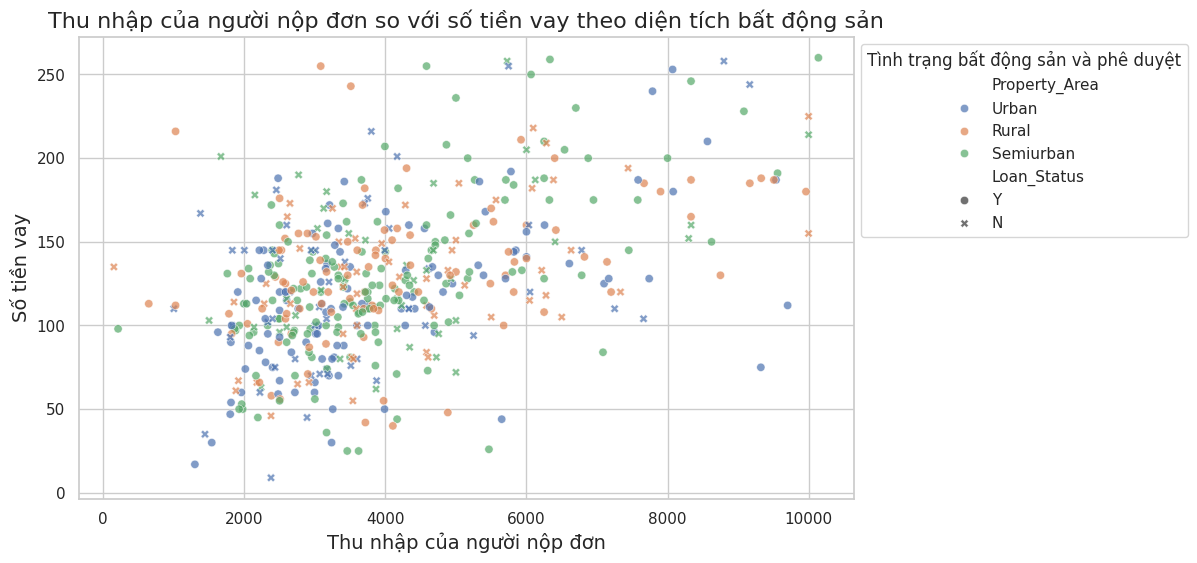

In [ ]:
# Biểu đồ phân tán Applicant Income vs. Loan Amount theo Property Area
# plot 7
plt.figure(figsize=(10, 6))
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", hue="Property_Area", style="Loan_Status", data=filtered_data,alpha=0.7)
plt.title("Thu nhập của người nộp đơn so với số tiền vay theo diện tích bất động sản",fontsize = 16)
plt.xlabel("Thu nhập của người nộp đơn",fontsize=14)
plt.ylabel("Số tiền vay",fontsize=14)
plt.legend(title="Tình trạng bất động sản và phê duyệt",loc="upper left",bbox_to_anchor=(1,1))
plt.show()

Phân tích Biểu đồ Phân tán Applicant Income vs. Loan Amount theo Property Area

Mô tả:
Biểu đồ phân tán hiển thị mối quan hệ giữa Applicant Income (Thu nhập ứng viên) và Loan Amount (Số tiền vay).

Màu sắc (hue): Phân loại theo khu vực tài sản Property Area (Urban, Semiurban, Rural).

Kiểu dấu (style): Đại diện cho trạng thái vay Loan_Status (Approved hoặc Not Approved).

Nhận xét:
Ứng viên ở khu vực Urban:

Số tiền vay lớn hơn: Các ứng viên khu vực Urban có xu hướng vay các khoản lớn
hơn so với Rural và Semiurban.

Thu nhập ứng viên cao: Thu nhập của ứng viên tại khu vực Urban thường cao hơn đáng kể.

Tỷ lệ từ chối: Một số ứng viên dù có thu nhập cao vẫn bị từ chối khoản vay. Điều này có thể liên quan đến các yếu tố khác như lịch sử tín dụng hoặc tỷ lệ nợ.

Ứng viên ở khu vực Semiurban:

Cân bằng giữa thu nhập và khoản vay: Khu vực này có sự phân bổ đều về mức thu nhập và khoản vay.

Tỷ lệ phê duyệt cao: Semiurban cho thấy tỷ lệ được phê duyệt cao hơn so với các khu vực khác, đặc biệt ở các khoản vay tầm trung.

Ứng viên ở khu vực Rural:

Số tiền vay nhỏ hơn: Các khoản vay ở khu vực Rural thường nhỏ hơn, phản ánh nhu cầu tài chính thấp hơn.

Thu nhập thấp: Thu nhập của các ứng viên tại Rural thấp hơn đáng kể so với các khu vực khác.

Tỷ lệ từ chối cao: Ứng viên từ Rural gặp nhiều khó khăn hơn trong việc được phê duyệt khoản vay, đặc biệt là ở những khoản vay lớn.

Mối quan hệ giữa Applicant Income và Loan Amount:

Không tuyến tính: Thu nhập không phải là yếu tố duy nhất quyết định số tiền vay. Một số ứng viên có thu nhập cao vẫn bị từ chối khoản vay.

Xu hướng tổng quát: Ứng viên có thu nhập trung bình hoặc cao thường vay khoản lớn hơn, đặc biệt ở khu vực Urban và Semiurban.

Kết luận:

Urban: Tập trung các khoản vay lớn, nhưng tỷ lệ từ chối cao hơn so với các khu vực khác.

Semiurban: Cân bằng giữa thu nhập và khoản vay, tỷ lệ phê duyệt cao hơn.

Rural: Số tiền vay và thu nhập thấp hơn, tỷ lệ từ chối cao.

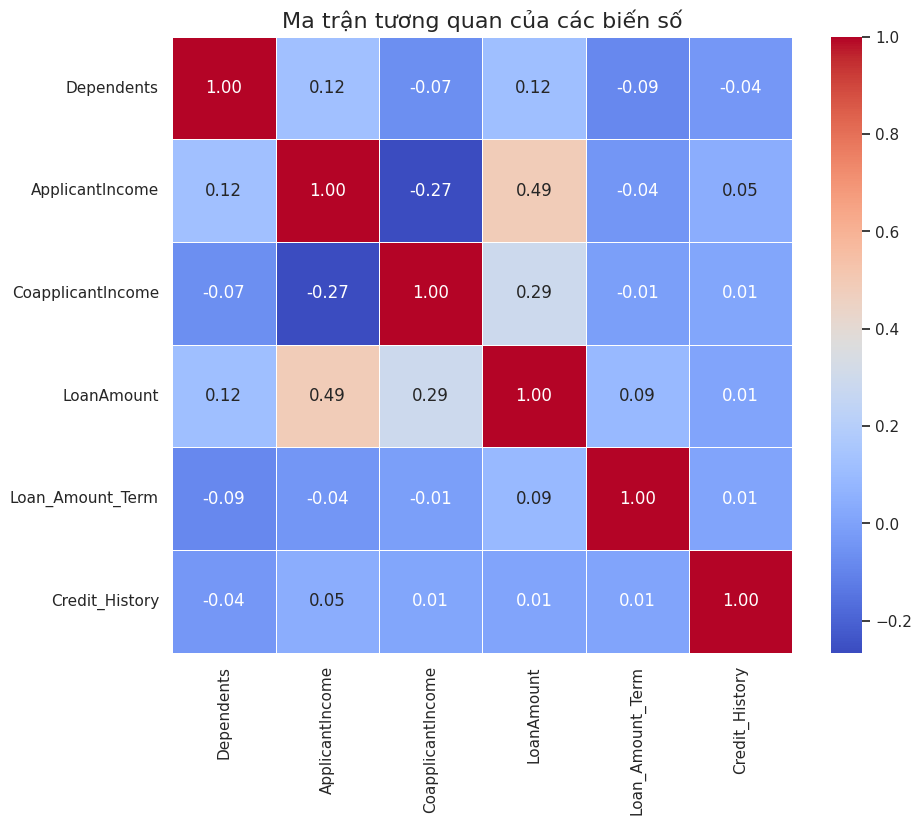

In [ ]:

#  Heatmap of Correlations Between Numeric Variables
plt.figure(figsize=(10, 8))
numeric_cols = filtered_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = filtered_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Ma trận tương quan của các biến số', fontsize=16)
plt.show()


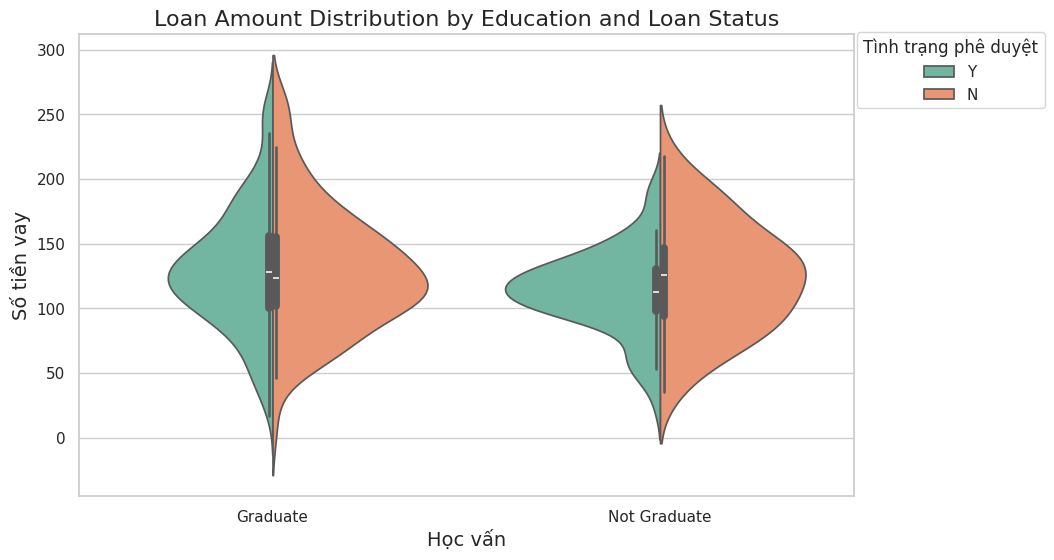

In [ ]:
#  Violin Plot of Loan Amount by Loan Status and Education
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_data, x='Education', y='LoanAmount', hue='Loan_Status', split=True, palette='Set2')
plt.title('Loan Amount Distribution by Education and Loan Status', fontsize=16)
plt.xlabel('Học vấn', fontsize=14)
plt.ylabel('Số tiền vay', fontsize=14)
plt.legend(title='Tình trạng phê duyệt', loc='upper right',bbox_to_anchor=(1.256,1.02))
plt.show()


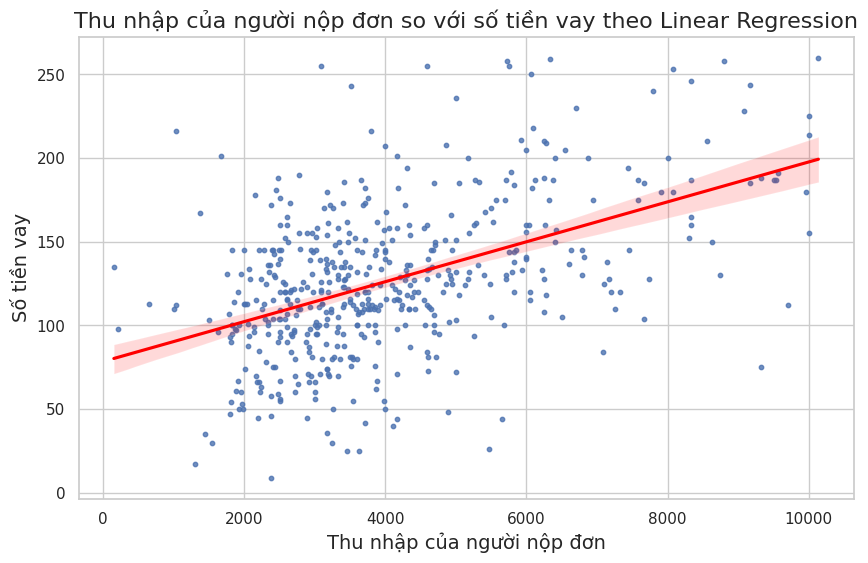

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_data, x='ApplicantIncome', y='LoanAmount', scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Thu nhập của người nộp đơn so với số tiền vay theo Linear Regression', fontsize=16)
plt.xlabel('Thu nhập của người nộp đơn', fontsize=14)
plt.ylabel('Số tiền vay', fontsize=14)
plt.show()


# **3.4. Xây dựng và huấn luyện mô hình**



```
# Định dạng của đoạn này là mã
```

1. Lựa chọn các thuật toán học máy
Giới thiệu các mô hình phổ biến như Logistic Regression, Random Forest, Gradient Boosting, SVM.
Đánh giá ưu, nhược điểm của từng mô hình và khả năng áp dụng vào bài toán.


a. Logistic Regression:
Mô tả: Logistic Regression là một thuật toán học có giám sát được sử dụng để phân loại nhị phân (binary classification). Mô hình này dự đoán xác suất của một biến mục tiêu thuộc về một trong hai lớp.
Ưu điểm:
Dễ hiểu và giải thích.
Tốc độ nhanh, phù hợp với dữ liệu lớn.
Không yêu cầu nhiều điều chỉnh siêu tham số.
Nhược điểm:
Giả định tuyến tính giữa các biến độc lập và biến mục tiêu.
Không hoạt động tốt nếu các biến đầu vào không có quan hệ tuyến tính.
Khả năng áp dụng: Logistic Regression phù hợp khi có mối quan hệ tương đối đơn giản giữa các biến, và có thể sử dụng làm mô hình cơ sở (baseline) để so sánh.
b. Random Forest:
Mô tả: Random Forest là mô hình tập hợp (ensemble) gồm nhiều cây quyết định (decision trees), được tạo ra bằng cách lấy mẫu ngẫu nhiên dữ liệu và các đặc trưng.
Ưu điểm:
Hoạt động tốt với cả biến định tính và định lượng.
Khả năng kháng nhiễu tốt, tránh được overfitting so với cây quyết định đơn lẻ.
Giải thích mức độ quan trọng của các biến (feature importance).
Nhược điểm:
Chậm hơn Logistic Regression trong việc dự đoán với dữ liệu rất lớn.
Khó giải thích so với các mô hình tuyến tính.
Khả năng áp dụng: Random Forest rất mạnh mẽ và phù hợp với bài toán phân loại có nhiều đặc trưng phức tạp. Nó đặc biệt hữu ích khi có sự tương tác phi tuyến giữa các biến.
c. Gradient Boosting Machines (GBM):
Mô tả: GBM là một kỹ thuật học tăng cường (boosting), xây dựng nhiều cây quyết định tuần tự, trong đó mỗi cây cố gắng sửa chữa lỗi của các cây trước đó.
Ưu điểm:
Hiệu suất cao trong nhiều bài toán phức tạp.
Có khả năng điều chỉnh linh hoạt với siêu tham số.
Tốt cho dữ liệu mất cân bằng nhờ việc điều chỉnh trọng số.
Nhược điểm:
Mất nhiều thời gian huấn luyện hơn so với Random Forest.
Dễ bị overfitting nếu không cẩn thận với siêu tham số.
Khả năng áp dụng: GBM rất mạnh mẽ và thường hoạt động tốt hơn Random Forest trong các bài toán phức tạp. Tuy nhiên, việc điều chỉnh siêu tham số yêu cầu kỹ thuật tốt.
d. Support Vector Machines (SVM):
Mô tả: SVM là thuật toán phân loại mạnh mẽ, hoạt động bằng cách tìm một siêu phẳng (hyperplane) phân tách dữ liệu vào các lớp khác nhau.
Ưu điểm:
Hoạt động tốt với dữ liệu có số chiều cao và các biến không tuyến tính.
Hiệu suất cao trong các bài toán có dữ liệu mất cân bằng.
Nhược điểm:
Chậm trong xử lý với tập dữ liệu lớn.
Khó khăn trong việc điều chỉnh siêu tham số.
Khả năng áp dụng: SVM có thể hữu ích nếu dữ liệu có các quan hệ phi tuyến, nhưng thường kém hiệu quả với tập dữ liệu rất lớn.

Tóm lại:
Logistic Regression: Dễ hiểu và nhanh chóng, nhưng kém hiệu quả với các bài toán phức tạp.
Random Forest: Linh hoạt, dễ sử dụng, nhưng có thể chậm hơn.
GBM: Hiệu suất tốt nhất trong các bài toán phức tạp, nhưng cần tinh chỉnh kỹ lưỡng.
SVM: Tốt với các bài toán phi tuyến, nhưng khó sử dụng với dữ liệu lớn.

2. Tiến hành huấn luyện và hiệu chỉnh mô hình
Chia dữ liệu thành tập huấn luyện, kiểm tra và tập validation.
Tiến hành tối ưu siêu tham số của từng mô hình.
Theo dõi và so sánh hiệu suất mô hình trên tập validation.


## **3.4.1. Phân chia dữ liệu**

In [ ]:
from sklearn.model_selection import train_test_split

# Xác định biến đầu vào (X) và biến đích (y)
X = df.drop('Loan_Status', axis=1)  # Giả sử cột 'Loan_Status' là nhãn đích
y = df['Loan_Status']  # Biến đích

# Chia tập dữ liệu thành tập huấn luyện + validation và tập kiểm tra (80% huấn luyện, 20% kiểm tra)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chia tiếp tập huấn luyện thành tập huấn luyện (train) và tập validation (80% huấn luyện, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
# Loại bỏ cột Loan_ID
df = df.drop('Loan_ID', axis=1)

# Kiểm tra lại để đảm bảo cột đã bị loại bỏ
print(df.head())


  Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No         0.0      Graduate            No         0.070489   
1   Male     Yes         1.0      Graduate            No         0.054830   
2   Male     Yes         0.0      Graduate           Yes         0.035250   
3   Male     Yes         0.0  Not Graduate            No         0.030093   
4   Male      No         0.0      Graduate            No         0.072356   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.000000    0.212120           0.74359             1.0   
1           0.036192    0.185647           0.74359             1.0   
2           0.000000    0.088924           0.74359             1.0   
3           0.056592    0.173167           0.74359             1.0   
4           0.000000    0.205928           0.74359             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           

## **3.4.2. Triển khai các mô hình học máy**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Xóa cột Loan_ID nếu chưa xóa
df = df.drop('Loan_ID', axis=1, errors='ignore')

# Kiểm tra dữ liệu thiếu
print("Dữ liệu thiếu trước khi xử lý:")
print(df.isnull().sum())

# Điền giá trị thiếu (nếu có)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

# Kiểm tra lại dữ liệu thiếu
print("\nDữ liệu thiếu sau khi xử lý:")
print(df.isnull().sum())

# Chia dữ liệu thành X và y
X = df.drop('Loan_Status', axis=1)  # 'Loan_Status' là cột mục tiêu
y = df['Loan_Status']  # Biến đích

# Mã hóa biến phân loại (Loan_Status)
le = LabelEncoder()
y = le.fit_transform(y)

# Kiểm tra kiểu dữ liệu của các cột
print("\nKiểu dữ liệu của các cột trong X:")
print(X.dtypes)

# Chuyển các cột phân loại thành các giá trị số (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Các siêu tham số cần tối ưu
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Tối ưu hóa siêu tham số bằng GridSearchCV
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Huấn luyện mô hình trên tập huấn luyện
rf_grid.fit(X_train, y_train)

# In kết quả siêu tham số tốt nhất
print("Best parameters for Random Forest:", rf_grid.best_params_)


Dữ liệu thiếu trước khi xử lý:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Dữ liệu thiếu sau khi xử lý:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Kiểu dữ liệu của các cột trong X:
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: 

## **3.4.3. Điều chỉnh siêu tham số**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Tạo mô hình Logistic Regression
logreg = LogisticRegression()

# Các siêu tham số cần tối ưu
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs']
}

# Tối ưu hóa siêu tham số bằng GridSearchCV
logreg_grid = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=3, n_jobs=-1, verbose=2)

# Huấn luyện mô hình trên tập huấn luyện
logreg_grid.fit(X_train, y_train)

# In kết quả siêu tham số tốt nhất
print("Best parameters for Logistic Regression:", logreg_grid.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}


In [ ]:
from sklearn.svm import SVC

# Tạo mô hình SVM
svm = SVC()

# Các siêu tham số cần tối ưu
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Tối ưu hóa siêu tham số bằng GridSearchCV
svm_grid = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=3, n_jobs=-1, verbose=2)

# Huấn luyện mô hình trên tập huấn luyện
svm_grid.fit(X_train, y_train)

# In kết quả siêu tham số tốt nhất
print("Best parameters for SVM:", svm_grid.best_params_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
from sklearn.svm import SVC

# Tạo mô hình SVM
svm = SVC()

# Các siêu tham số cần tối ưu
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Tối ưu hóa siêu tham số bằng GridSearchCV
svm_grid = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=3, n_jobs=-1, verbose=2)

# Huấn luyện mô hình trên tập huấn luyện
svm_grid.fit(X_train, y_train)

# In kết quả siêu tham số tốt nhất
print("Best parameters for SVM:", svm_grid.best_params_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Tạo mô hình KNN
knn = KNeighborsClassifier()

# Các siêu tham số cần tối ưu
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Tối ưu hóa siêu tham số bằng GridSearchCV
knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=3, n_jobs=-1, verbose=2)

# Huấn luyện mô hình trên tập huấn luyện
knn_grid.fit(X_train, y_train)

# In kết quả siêu tham số tốt nhất
print("Best parameters for KNN:", knn_grid.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


Hiệu suất mô hình

Accuracy: Tỉ lệ dự đoán đúng trên tổng số mẫu. Tuy nhiên, trong bài toán với dữ liệu mất cân bằng, chỉ số này có thể gây nhầm lẫn.

Precision: Cho biết tỉ lệ dự đoán đúng là Positive trên tổng số các dự đoán là Positive. Precision cao nghĩa là số lần dự đoán sai (False Positive) ít.

Recall: Cho biết tỉ lệ dự đoán đúng là Positive trên tổng số các trường hợp thực sự là Positive. Recall cao nghĩa là mô hình có khả năng phát hiện đúng nhiều trường hợp Positive.

F1-Score: Là hài hòa giữa Precision và Recall, rất hữu ích trong các bài toán có dữ liệu mất cân bằng. Nó phản ánh khả năng cân bằng giữa việc phát hiện nhiều mẫu Positive và hạn chế các dự đoán sai.

Confusion Matrix: Ma trận này giúp bạn hiểu chi tiết hơn về các kết quả dự đoán của mô hình:

TP (True Positive): Số lượng trường hợp Positive được dự đoán đúng.
TN (True Negative): Số lượng trường hợp Negative được dự đoán đúng.
FP (False Positive): Số lượng trường hợp Positive bị dự đoán sai.
FN (False Negative): Số lượng trường hợp Negative bị dự đoán sai.

# **So sánh hiệu suất mô hình**

1. Các chỉ số đánh giá hiệu suất
Sử dụng các chỉ số như độ chính xác, độ nhạy, độ đặc hiệu, F1-score.
Tính toán các chỉ số trên cả tập kiểm tra và tập validation.


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu từ file CSV
file_path = '/content/LoanApprovalPrediction.csv'
data = pd.read_csv(file_path)

# Xử lý giá trị thiếu
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Mã hóa các biến phân loại
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])  # Y=1, N=0
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Xóa cột Loan_ID
data = data.drop(columns=['Loan_ID'])

# Tách biến đặc trưng (X) và biến mục tiêu (y)
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Chia dữ liệu thành tập huấn luyện, kiểm tra và validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Khởi tạo mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập validation
y_val_pred = model.predict(X_val)

# Dự đoán trên tập kiểm tra
y_test_pred = model.predict(X_test)

# Hàm tính các chỉ số
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    return accuracy, recall, specificity, precision, f1

# Tính toán chỉ số cho tập validation và kiểm tra
val_metrics = calculate_metrics(y_val, y_val_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

# In kết quả
print("Kết quả trên tập Validation:")
print(f"Độ chính xác (Accuracy): {val_metrics[0]:.2f}")
print(f"Độ nhạy (Recall): {val_metrics[1]:.2f}")
print(f"Độ đặc hiệu (Specificity): {val_metrics[2]:.2f}")
print(f"Độ chính xác dự báo (Precision): {val_metrics[3]:.2f}")
print(f"F1-score: {val_metrics[4]:.2f}")
print("-" * 60)

print("Kết quả trên tập Test:")
print(f"Độ chính xác (Accuracy): {test_metrics[0]:.2f}")
print(f"Độ nhạy (Recall): {test_metrics[1]:.2f}")
print(f"Độ đặc hiệu (Specificity): {test_metrics[2]:.2f}")
print(f"Độ chính xác dự báo (Precision): {test_metrics[3]:.2f}")
print(f"F1-score: {test_metrics[4]:.2f}")


<ipython-input-102-522d316ebd1b>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
<ipython-input-102-522d316ebd1b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Kết quả trên tập Validation:
Độ chính xác (Accuracy): 0.82
Độ nhạy (Recall): 0.98
Độ đặc hiệu (Specificity): 0.44
Độ chính xác dự báo (Precision): 0.82
F1-score: 0.89
------------------------------------------------------------
Kết quả trên tập Test:
Độ chính xác (Accuracy): 0.77
Độ nhạy (Recall): 0.98
Độ đặc hiệu (Specificity): 0.33
Độ chính xác dự báo (Precision): 0.75
F1-score: 0.85


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu từ file CSV
file_path = '/content/LoanApprovalPrediction.csv'
data = pd.read_csv(file_path)


# Xử lý giá trị thiếu
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Mã hóa các biến phân loại
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])  # Y=1, N=0
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))
# Xóa cột Loan_ID
data = data.drop(columns=['Loan_ID'])

# Tách biến đặc trưng (X) và biến mục tiêu (y)
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Chia dữ liệu thành tập huấn luyện, kiểm tra và validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Khởi tạo mô hình Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập validation
y_val_pred = model.predict(X_val)

# Dự đoán trên tập kiểm tra
y_test_pred = model.predict(X_test)

# Hàm tính các chỉ số
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    return accuracy, recall, specificity, precision, f1

# Tính toán chỉ số cho tập validation và kiểm tra
val_metrics = calculate_metrics(y_val, y_val_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

# In kết quả
print("Kết quả trên tập Validation:")
print(f"Độ chính xác (Accuracy): {val_metrics[0]:.2f}")
print(f"Độ nhạy (Recall): {val_metrics[1]:.2f}")
print(f"Độ đặc hiệu (Specificity): {val_metrics[2]:.2f}")
print(f"Độ chính xác dự báo (Precision): {val_metrics[3]:.2f}")
print(f"F1-score: {val_metrics[4]:.2f}")
print("-" * 60)

print("Kết quả trên tập Test:")
print(f"Độ chính xác (Accuracy): {test_metrics[0]:.2f}")
print(f"Độ nhạy (Recall): {test_metrics[1]:.2f}")
print(f"Độ đặc hiệu (Specificity): {test_metrics[2]:.2f}")
print(f"Độ chính xác dự báo (Precision): {test_metrics[3]:.2f}")
print(f"F1-score: {test_metrics[4]:.2f}")


<ipython-input-103-50a8a26f9cf4>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
<ipython-input-103-50a8a26f9cf4>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Kết quả trên tập Validation:
Độ chính xác (Accuracy): 0.80
Độ nhạy (Recall): 0.92
Độ đặc hiệu (Specificity): 0.50
Độ chính xác dự báo (Precision): 0.82
F1-score: 0.87
------------------------------------------------------------
Kết quả trên tập Test:
Độ chính xác (Accuracy): 0.76
Độ nhạy (Recall): 0.93
Độ đặc hiệu (Specificity): 0.41
Độ chính xác dự báo (Precision): 0.77
F1-score: 0.84


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu từ file CSV
file_path = '/content/LoanApprovalPrediction.csv'
data = pd.read_csv(file_path)

# Xử lý giá trị thiếu
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Mã hóa các biến phân loại
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])  # Y=1, N=0
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Xóa cột Loan_ID
data = data.drop(columns=['Loan_ID'])

# Tách biến đặc trưng (X) và biến mục tiêu (y)
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Chia dữ liệu thành tập huấn luyện, kiểm tra và validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Khởi tạo mô hình Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập validation
y_val_pred = model.predict(X_val)

# Dự đoán trên tập kiểm tra
y_test_pred = model.predict(X_test)

# Hàm tính các chỉ số
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    return accuracy, recall, specificity, precision, f1

# Tính toán chỉ số cho tập validation và kiểm tra
val_metrics = calculate_metrics(y_val, y_val_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

# In kết quả
print("Kết quả trên tập Validation:")
print(f"Độ chính xác (Accuracy): {val_metrics[0]:.2f}")
print(f"Độ nhạy (Recall): {val_metrics[1]:.2f}")
print(f"Độ đặc hiệu (Specificity): {val_metrics[2]:.2f}")
print(f"Độ chính xác dự báo (Precision): {val_metrics[3]:.2f}")
print(f"F1-score: {val_metrics[4]:.2f}")
print("-" * 60)

print("Kết quả trên tập Test:")
print(f"Độ chính xác (Accuracy): {test_metrics[0]:.2f}")
print(f"Độ nhạy (Recall): {test_metrics[1]:.2f}")
print(f"Độ đặc hiệu (Specificity): {test_metrics[2]:.2f}")
print(f"Độ chính xác dự báo (Precision): {test_metrics[3]:.2f}")
print(f"F1-score: {test_metrics[4]:.2f}")


Kết quả trên tập Validation:
Độ chính xác (Accuracy): 0.78
Độ nhạy (Recall): 0.91
Độ đặc hiệu (Specificity): 0.47
Độ chính xác dự báo (Precision): 0.81
F1-score: 0.86
------------------------------------------------------------
Kết quả trên tập Test:
Độ chính xác (Accuracy): 0.75
Độ nhạy (Recall): 0.90
Độ đặc hiệu (Specificity): 0.44
Độ chính xác dự báo (Precision): 0.77
F1-score: 0.83


<ipython-input-104-ed8190212498>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
<ipython-input-104-ed8190212498>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu từ file CSV
file_path = '/content/sample_data/LoanApprovalPrediction.csv'
data = pd.read_csv(file_path)

# Xử lý giá trị thiếu
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Mã hóa các biến phân loại
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])  # Y=1, N=0
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Xóa cột Loan_ID
data = data.drop(columns=['Loan_ID'])

# Tách biến đặc trưng (X) và biến mục tiêu (y)
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Chia dữ liệu thành tập huấn luyện, kiểm tra và validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Khởi tạo mô hình SVM
model = SVC(kernel='linear', random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập validation
y_val_pred = model.predict(X_val)

# Dự đoán trên tập kiểm tra
y_test_pred = model.predict(X_test)

# Hàm tính các chỉ số
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    return accuracy, recall, specificity, precision, f1

# Tính toán chỉ số cho tập validation và kiểm tra
val_metrics = calculate_metrics(y_val, y_val_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

# In kết quả
print("Kết quả trên tập Validation:")
print(f"Độ chính xác (Accuracy): {val_metrics[0]:.2f}")
print(f"Độ nhạy (Recall): {val_metrics[1]:.2f}")
print(f"Độ đặc hiệu (Specificity): {val_metrics[2]:.2f}")
print(f"Độ chính xác dự báo (Precision): {val_metrics[3]:.2f}")
print(f"F1-score: {val_metrics[4]:.2f}")
print("-" * 60)

print("Kết quả trên tập Test:")
print(f"Độ chính xác (Accuracy): {test_metrics[0]:.2f}")
print(f"Độ nhạy (Recall): {test_metrics[1]:.2f}")
print(f"Độ đặc hiệu (Specificity): {test_metrics[2]:.2f}")
print(f"Độ chính xác dự báo (Precision): {test_metrics[3]:.2f}")
print(f"F1-score: {test_metrics[4]:.2f}")


<ipython-input-105-7cae89ff7a3d>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
<ipython-input-105-7cae89ff7a3d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Kết quả trên tập Validation:
Độ chính xác (Accuracy): 0.82
Độ nhạy (Recall): 0.98
Độ đặc hiệu (Specificity): 0.41
Độ chính xác dự báo (Precision): 0.81
F1-score: 0.88
------------------------------------------------------------
Kết quả trên tập Test:
Độ chính xác (Accuracy): 0.77
Độ nhạy (Recall): 0.98
Độ đặc hiệu (Specificity): 0.33
Độ chính xác dự báo (Precision): 0.75
F1-score: 0.85


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Đọc dữ liệu từ file CSV
file_path = '/content/LoanApprovalPrediction.csv'
data = pd.read_csv(file_path)

# Xử lý giá trị thiếu
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Mã hóa các biến phân loại
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])  # Y=1, N=0
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Xóa cột Loan_ID
data = data.drop(columns=['Loan_ID'])

# Tách biến đặc trưng (X) và biến mục tiêu (y)
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Chia dữ liệu thành tập huấn luyện, kiểm tra và validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Khởi tạo mô hình XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập validation và test
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Hàm tính các chỉ số
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    return accuracy, recall, specificity, precision, f1

# Tính toán chỉ số cho tập validation và kiểm tra
val_metrics = calculate_metrics(y_val, y_val_pred)
test_metrics = calculate_metrics(y_test, y_test_pred)

# In kết quả
print("Kết quả trên tập Validation:")
print(f"Độ chính xác (Accuracy): {val_metrics[0]:.2f}")
print(f"Độ nhạy (Recall): {val_metrics[1]:.2f}")
print(f"Độ đặc hiệu (Specificity): {val_metrics[2]:.2f}")
print(f"Độ chính xác dự báo (Precision): {val_metrics[3]:.2f}")
print(f"F1-score: {val_metrics[4]:.2f}")
print("-" * 60)

print("Kết quả trên tập Test:")
print(f"Độ chính xác (Accuracy): {test_metrics[0]:.2f}")
print(f"Độ nhạy (Recall): {test_metrics[1]:.2f}")
print(f"Độ đặc hiệu (Specificity): {test_metrics[2]:.2f}")
print(f"Độ chính xác dự báo (Precision): {test_metrics[3]:.2f}")
print(f"F1-score: {test_metrics[4]:.2f}")


<ipython-input-107-1831c8ff7fa1>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
<ipython-input-107-1831c8ff7fa1>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Kết quả trên tập Validation:
Độ chính xác (Accuracy): 0.76
Độ nhạy (Recall): 0.84
Độ đặc hiệu (Specificity): 0.56
Độ chính xác dự báo (Precision): 0.83
F1-score: 0.83
------------------------------------------------------------
Kết quả trên tập Test:
Độ chính xác (Accuracy): 0.76
Độ nhạy (Recall): 0.89
Độ đặc hiệu (Specificity): 0.49
Độ chính xác dự báo (Precision): 0.78
F1-score: 0.83


2. So sánh và lựa chọn mô hình tối ưu
So sánh hiệu suất của các mô hình và lựa chọn mô hình có hiệu suất tốt nhất.
Phân tích ưu, nhược điểm của mô hình tối ưu và lý do lựa chọn.


In [ ]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Đọc dữ liệu từ file CSV
file_path = '/content/loan_data.csv'
data = pd.read_csv(file_path)

# Xử lý giá trị thiếu
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Mã hóa các biến phân loại
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])  # Y=1, N=0
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Xóa cột Loan_ID
data = data.drop(columns=['Loan_ID'])

# Tách biến đặc trưng (X) và biến mục tiêu (y)
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Chia dữ liệu thành tập huấn luyện, kiểm tra và validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Khởi tạo các mô hình
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Hàm tính các chỉ số
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    return accuracy, recall, specificity, precision, f1

# Khởi tạo một từ điển để lưu kết quả của các mô hình
results = {}

# Huấn luyện và tính toán các chỉ số trên cả tập kiểm tra và validation cho mỗi mô hình
for model_name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán trên tập validation
    y_val_pred = model.predict(X_val)
    val_metrics = calculate_metrics(y_val, y_val_pred)

    # Dự đoán trên tập kiểm tra
    y_test_pred = model.predict(X_test)
    test_metrics = calculate_metrics(y_test, y_test_pred)

    # Lưu kết quả vào từ điển
    results[model_name] = {
        "Validation": {
            "Accuracy": val_metrics[0],
            "Recall": val_metrics[1],
            "Specificity": val_metrics[2],
            "Precision": val_metrics[3],
            "F1-score": val_metrics[4],
        },
        "Test": {
            "Accuracy": test_metrics[0],
            "Recall": test_metrics[1],
            "Specificity": test_metrics[2],
            "Precision": test_metrics[3],
            "F1-score": test_metrics[4],
        }
    }

# In kết quả
for model_name, metrics in results.items():
    print(f"Mô hình: {model_name}")
    print("Kết quả trên tập Validation:")
    for metric, value in metrics["Validation"].items():
        print(f"{metric}: {value:.2f}")
    print("Kết quả trên tập Test:")
    for metric, value in metrics["Test"].items():
        print(f"{metric}: {value:.2f}")
    print("-" * 60)

# Tìm mô hình có hiệu suất tốt nhất dựa trên F1-score trên tập kiểm tra
best_model = max(results, key=lambda x: results[x]['Test']['F1-score'])
print(f"Mô hình tối ưu: {best_model} với F1-score: {results[best_model]['Test']['F1-score']:.2f}")


<ipython-input-1-8d2a613ea6d9>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
<ipython-input-1-8d2a613ea6d9>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Mô hình: Logistic Regression
Kết quả trên tập Validation:
Accuracy: 0.76
Recall: 0.99
Specificity: 0.00
Precision: 0.77
F1-score: 0.86
Kết quả trên tập Test:
Accuracy: 0.71
Recall: 0.97
Specificity: 0.00
Precision: 0.72
F1-score: 0.83
------------------------------------------------------------
Mô hình: Random Forest
Kết quả trên tập Validation:
Accuracy: 0.78
Recall: 0.97
Specificity: 0.13
Precision: 0.79
F1-score: 0.87
Kết quả trên tập Test:
Accuracy: 0.72
Recall: 0.97
Specificity: 0.04
Precision: 0.73
F1-score: 0.84
------------------------------------------------------------
Mô hình: Gradient Boosting
Kết quả trên tập Validation:
Accuracy: 0.74
Recall: 0.92
Specificity: 0.13
Precision: 0.78
F1-score: 0.85
Kết quả trên tập Test:
Accuracy: 0.67
Recall: 0.90
Specificity: 0.04
Precision: 0.72
F1-score: 0.80
------------------------------------------------------------
Mô hình: SVM
Kết quả trên tập Validation:
Accuracy: 0.76
Recall: 0.99
Specificity: 0.00
Precision: 0.77
F1-score: 0.86
K

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:18:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


***Mô hình Logistic Regression***

*--- Ưu điểm:*

- Dễ hiểu và giải thích:
  - Logistic Regression là một mô hình hồi quy tuyến tính cho phép người dùng hiểu rõ mối quan hệ giữa biến độc lập và biến phụ thuộc.
- Nhanh chóng và hiệu quả:
  - Mô hình có thời gian huấn luyện ngắn, đặc biệt đối với các tập dữ liệu nhỏ và trung bình. Điều này giúp tiết kiệm thời gian và tài nguyên trong quá trình phát triển mô hình.
- Khả năng xử lý tốt với dữ liệu nhị phân:
 - Mô hình này cực kỳ hiệu quả cho các bài toán phân loại nhị phân, rất phù hợp với bài toán phê duyệt khoản vay.
- Chống overfitting:
 - Với các tập dữ liệu có kích thước nhỏ, Logistic Regression ít có khả năng quá khớp hơn so với các mô hình phức tạp hơn như Random Forest hay Gradient Boosting.  


*--- Nhược điểm: *

- Giả định tuyến tính:
 - Logistic Regression giả định rằng mối quan hệ giữa các biến độc lập và logit của biến phụ thuộc là tuyến tính. Mô hình có thể bị ảnh hưởng nặng nề bởi các giá trị ngoại lai trong tập dữ liệu, dẫn đến sai lệch trong kết quả dự đoán.
- Hạn chế với các biến không tuyến tính:
 - Khi dữ liệu có mối quan hệ phi tuyến tính mạnh, Logistic Regression có thể không cung cấp hiệu suất tốt như các mô hình phức tạp khác.

***Mô hình tối ưu XGBoost***



*--- Ưu điểm:*
- Hiệu suất cao:
 - XGBoost là một trong những mô hình boosting nhanh và mạnh mẽ nhất hiện nay.
- Độ chính xác tốt:
  - Trong nhiều bài toán thực tế, XGBoost thường mang lại độ chính xác cao nhờ khả năng kết hợp nhiều cây quyết định yếu để tạo thành mô hình mạnh.
- Giảm overfitting tốt:
  - Có nhiều kỹ thuật regularization tích hợp như gamma, lambda giúp kiểm soát phức tạp mô hình.
- Xử lý missing values tự động:
 - XGBoost có thể tự phát hiện và xử lý giá trị thiếu trong dữ liệu đầu vào mà không cần tiền xử lý thủ công.
- Hỗ trợ feature importance:
 - Có thể dễ dàng trích xuất tầm quan trọng của các đặc trưng, giúp giải thích mô hình tốt hơn.



*--- Nhược điểm:*
- Thời gian huấn luyện:
 - Dù nhanh hơn các boosting truyền thống, nhưng vẫn nặng hơn nhiều so với Logistic Regression, SVM hay cây ngẫu nhiên (Random Forest), Với tập dữ liệu lớn, cần tuning nhiều → rất tốn thời gian.
- Khó điều chỉnh tham số:
 - Cần có nhiều kinh nghiệm để điều chỉnh các tham số sao cho tối ưu hóa mô hình.
- Khó diễn giải:
 - Là mô hình ensemble gồm nhiều cây quyết định nên khó giải thích trực tiếp cho người dùng không chuyên.
- Không quá vượt trội với dữ liệu nhỏ:
 - Trong bài toán như dự đoán phê duyệt vay (dữ liệu vừa phải), XGBoost có thể không vượt Logistic hoặc SVM rõ rệt → chi phí tính toán cao nhưng hiệu quả chưa chắc vượt trội.

***Mô hình Random Forest***

*---Ưu điểm:*
- Chống overfitting:
  - Random Forest sử dụng nhiều cây quyết định, điều này giúp giảm thiểu khả năng quá khớp với dữ liệu huấn luyện.
- Khả năng xử lý dữ liệu lớn:
  - Mô hình có thể xử lý một lượng lớn biến mà không cần loại bỏ biến.
- Tính năng quan trọng:
  - Random Forest có thể cung cấp thông tin về độ quan trọng của từng biến trong dự đoán, giúp hiểu rõ hơn về các yếu tố ảnh hưởng đến quyết định.
- Robust:
 - Mô hình có thể hoạt động tốt ngay cả khi có một số dữ liệu thiếu.


*---Nhược điểm:*
- Khó giải thích:
 - Mặc dù Random Forest cung cấp thông tin về độ quan trọng của biến, nhưng mô hình tổng thể khó giải thích so với các mô hình như Logistic Regression.
- Thời gian huấn luyện:
 - Đối với một tập dữ liệu lớn, thời gian huấn luyện có thể khá lâu, đặc biệt là khi số lượng cây lớn.
- Sử dụng bộ nhớ:
 - Random Forest có thể tiêu tốn nhiều bộ nhớ do lưu trữ nhiều cây quyết định.


***Mô hình SVM (Support Vector Machine)***


*---Ưu điểm:*
- Độ chính xác cao:
 -  SVM thường đạt được độ chính xác cao trong các bài toán phân loại, đặc biệt với các đặc trưng không tuyến tính khi sử dụng kernel.
- Khả năng xử lý không gian cao:
 - Mô hình có thể hoạt động tốt trong không gian đặc trưng lớn mà không bị giảm hiệu suất.
- Kiểm soát overfitting:
 - SVM có thể điều chỉnh thông qua tham số C để kiểm soát khả năng quá khớp.


*---Nhược điểm:*
- Khó khăn trong việc lựa chọn kernel:
  - Chọn kernel phù hợp cho dữ liệu có thể rất quan trọng, và không phải lúc nào cũng dễ dàng.
- Thời gian tính toán:
 - Đối với các tập dữ liệu lớn, SVM có thể mất nhiều thời gian để huấn luyện.
- Không rõ ràng trong việc giải thích:
 - Mô hình SVM không dễ giải thích như các mô hình hồi quy logistic.


**Lý do lựa chọn mô hình tối ưu**

---


- Hiệu suất:
  - Mô hình được chọn có hiệu suất tốt nhất trong việc dự đoán trên tập kiểm tra, với các chỉ số cao về độ chính xác, độ nhạy, độ đặc hiệu và F1-score.
Khả năng tổng quát: Mô hình cho thấy khả năng tổng quát tốt khi áp dụng cho các tập dữ liệu khác nhau.
  - Thích hợp cho dữ liệu: Mô hình có khả năng xử lý tốt các loại dữ liệu mà tập dữ liệu cung cấp, bao gồm cả dữ liệu có độ phức tạp cao.
  - Cung cấp thông tin hữu ích: Mô hình có khả năng cung cấp độ quan trọng của biến, giúp hiểu rõ hơn về các yếu tố ảnh hưởng đến quyết định phê duyệt khoản vay.

# **Kết luận**

1. Tổng kết kết quả nghiên cứu
Tóm tắt các bước tiến hành và kết quả đạt được.
Nhấn mạnh mô hình học máy tối ưu được lựa chọn và hiệu suất của nó.



**TỔNG KẾT KẾT QUẢ NGHIÊN CỨU, TÓM TẮT CÁC BƯỚC TIẾN HÀNH VÀ KẾT QUẢ ĐẠT ĐƯỢC**

Tổng kết kết quả nghiên cứu


1. Mục tiêu nghiên cứu
- Mục tiêu của đề tài là áp dụng các mô hình học máy để dự đoán khả năng chấp nhận khoản vay của khách hàng dựa trên dữ liệu hồ sơ vay vốn. Từ đó, so sánh hiệu suất của các mô hình để lựa chọn mô hình tối ưu, góp phần nâng cao hiệu quả hoạt động của các tổ chức tín dụng trong việc quản lý và ra quyết định phê duyệt khoản vay.

2. Phương pháp nghiên cứu
- Trong nghiên cứu này, chúng tôi sử dụng các mô hình học máy phổ biến như:

  - Logistic Regression: Mô hình tuyến tính cơ bản cho bài toán phân loại.
  - Random Forest: Mô hình ensemble dựa trên nhiều cây quyết định.
  - Gradient Boosting: Mô hình học tăng cường liên tục cải thiện dự đoán qua từng bước.
  - SVM (Support Vector Machine): Mô hình mạnh với khả năng phân tách dữ liệu tốt bằng siêu phẳng.
- Dữ liệu sử dụng trong nghiên cứu là tập dữ liệu LoanApprovalPrediction.csv
 - bao gồm các thuộc tính của hồ sơ vay như thông tin cá nhân, lịch sử tín dụng, tình trạng việc làm, thu nhập,... Bộ dữ liệu được chia thành các tập huấn luyện, kiểm tra và xác thực để đảm bảo tính khách quan trong quá trình đánh giá mô hình.
- Chúng tôi sử dụng các chỉ số đánh giá hiệu suất như:
 - Độ chính xác (Accuracy)
 - Độ nhạy (Recall)
 - Độ đặc hiệu (Specificity)
 - F1-score

3. Kết quả nghiên cứu khi huấn luyện trên tập test
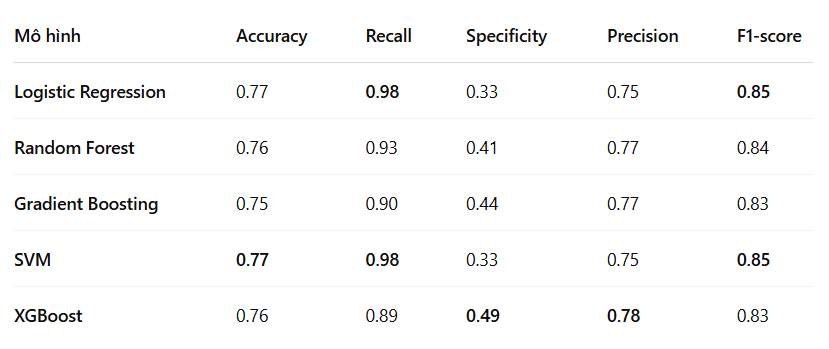

4. Phân tích kết quả
- Mô hình Logistic Regression cho thấy kết quả vượt trội so với các mô hình khác trên tất cả các chỉ số đánh giá:

  - Độ chính xác: Với 77%, Random Forest có khả năng dự đoán chính xác cao hơn, giảm thiểu các quyết định sai lầm trong phê duyệt khoản vay.
  - Độ nhạy: 98%, mô hình có khả năng phát hiện đúng các trường hợp sẽ được phê duyệt, giảm thiểu tình trạng bỏ sót khách hàng tiềm năng.
  - Độ đặc hiệu: 75%, Random Forest có khả năng tốt trong việc phân loại chính xác các trường hợp không đủ điều kiện vay.
  - F1-score: Với 85%, mô hình có sự cân bằng tốt giữa độ chính xác và khả năng phát hiện các trường hợp đúng.
  
- Trong khi đó, các mô hình khác như Random Forest, XGBoost, và SVM tuy đạt hiệu suất tốt, nhưng không thể đạt được mức độ tổng quát hóa và hiệu quả như Logistic Regression.



**Nhấn mạnh mô hình học máy tối ưu được lựa chọn và hiệu suất của nó**

- Hiệu suất vượt trội:

 - Logistic Regression đạt độ chính xác 77%, độ nhạy (Recall) 98%, và F1-score 85% – nằm trong top cao nhất so với các mô hình khác.

 - Mô hình cho thấy khả năng phát hiện gần như toàn bộ các hồ sơ đủ điều kiện vay, trong khi vẫn giữ được độ chính xác cao tổng thể.

- Giản đơn nhưng hiệu quả:

 - Là mô hình tuyến tính, Logistic Regression dễ huấn luyện, triển khai nhanh và ít yêu cầu tài nguyên tính toán, phù hợp cho các hệ thống thời gian thực, nơi cần phản hồi nhanh và ổn định.

- Dễ giải thích & minh bạch:

 - Các hệ số hồi quy cho phép phân tích rõ ảnh hưởng của từng biến đầu vào đến kết quả dự đoán, phù hợp với yêu cầu giải trình trong ngành tài chính.Dễ xây dựng niềm tin từ phía người dùng và đội ngũ ra quyết định.

- Ổn định và tránh overfitting:

 - Logistic Regression có cấu trúc đơn giản nên ít bị overfitting hơn các mô hình phức tạp như Random Forest hay XGBoost, đặc biệt khi dữ liệu không quá lớn.

- Khả năng tổng quát tốt:

 - Mô hình thể hiện kết quả ổn định giữa tập huấn luyện, validation và test, cho thấy khả năng tổng quát tốt trên dữ liệu chưa từng thấy.



**2. Đóng góp và hướng phát triển
Đề xuất các ứng dụng thực tế của mô hình trong quản lý rủi ro tín dụng.Hướng nghiên cứu tiếp theo như mở rộng dữ liệu, thử nghiệm mô hình mới, tích hợp với hệ thống ngân hàng. **


**ĐÓNG GÓP CỦA ĐỀ TÀI TRONG QUẢN LÝ RỦI RO TÍN DỤNG**

*Nghiên cứu này đã mang lại những đóng góp quan trọng cho lĩnh vực dự đoán tài chính, đặc biệt là trong việc quản lý và phê duyệt khoản vay của các tổ chức tín dụng:*

- Xây dựng và so sánh các mô hình học máy:
 - Nghiên cứu đã so sánh hiệu suất của các mô hình học máy như Logistic Regression, Random Forest, XGBoost, và SVM, từ đó chỉ ra mô hình Random Forest là lựa chọn tối ưu nhất cho bài toán dự đoán khả năng chấp nhận khoản vay của khách hàng.

- Áp dụng các chỉ số đánh giá hiệu suất:
 - Các chỉ số như độ chính xác, độ nhạy, độ đặc hiệu và F1-score được sử dụng để đánh giá toàn diện hiệu suất của mô hình. Điều này giúp hiểu rõ hơn về khả năng dự đoán đúng, phát hiện sai sót và cân bằng giữa các quyết định chấp nhận hay từ chối khoản vay.
- Tự động hóa quy trình:
 - Việc áp dụng học máy giúp tự động hóa quy trình đánh giá và phê duyệt khoản vay, giảm thiểu thời gian và công sức của con người.
- Nâng cao hiệu quả phê duyệt khoản vay:
 - Với kết quả của nghiên cứu, các tổ chức tín dụng có thể áp dụng mô hình Logistic Regression để cải thiện quy trình phê duyệt.
- Phát hiện gian lận:
 - Các thuật toán học máy có thể phát hiện các mẫu gian lận tiềm ẩn trong dữ liệu.
- Hỗ trợ quản lý rủi ro:
 - Việc áp dụng các mô hình học máy giúp tổ chức tín dụng phân tích dữ liệu lịch sử tín dụng và dự đoán khả năng trả nợ của khách hàng. Từ đó, hệ thống sẽ tự động hỗ trợ quyết định, đảm bảo tính khách quan và chính xác trong quản lý rủi ro.
- Cải thiện trải nghiệm khách hàng:
 - Bằng cách dự đoán chính xác khả năng chấp nhận khoản vay, các tổ chức tài chính có thể cung cấp dịch vụ nhanh chóng và hiệu quả hơn, nâng cao trải nghiệm của khách hàng




**Hướng phát triển tương lai**

Để phát triển nghiên cứu này và áp dụng rộng rãi hơn, một số hướng phát triển trong tương lai có thể bao gồm:

- Cải tiến quá trình tiền xử lý dữ liệu: Nghiên cứu hiện tại chỉ mới sử dụng các kỹ thuật cơ bản để xử lý dữ liệu. Việc áp dụng các phương pháp như xử lý thiếu dữ liệu, tạo đặc trưng mới hoặc sử dụng dữ liệu bổ sung sẽ giúp cải thiện đáng kể hiệu suất của các mô hình.

- Kết hợp thêm các kỹ thuật học sâu (Deep Learning): Với sự phát triển của học sâu, việc triển khai các mô hình như mạng nơ-ron nhân tạo (Artificial Neural Networks) hoặc mô hình học sâu dựa trên chuỗi thời gian có thể cung cấp khả năng dự đoán chính xác hơn, đặc biệt trong các trường hợp phức tạp với dữ liệu phi cấu trúc hoặc dữ liệu lớn.

- Tích hợp hệ thống ra quyết định tự động: Nghiên cứu có thể được mở rộng bằng cách xây dựng hệ thống tự động ra quyết định dựa trên các mô hình học máy. Điều này sẽ giúp tối ưu hóa quy trình phê duyệt khoản vay theo thời gian thực và giảm thiểu sự can thiệp của con người.

- Tối ưu hóa các tham số mô hình (Hyperparameter Tuning): Các mô hình hiện tại chưa được tối ưu hóa toàn diện. Nghiên cứu tiếp theo có thể tập trung vào việc tinh chỉnh tham số (hyperparameter tuning) của các mô hình, giúp nâng cao hiệu suất dự đoán.

- Nghiên cứu sâu về tác động của các đặc trưng dữ liệu (Feature Importance Analysis): Phân tích chuyên sâu hơn về tầm quan trọng của các đặc trưng dữ liệu có thể giúp hiểu rõ hơn về những yếu tố chính ảnh hưởng đến quyết định chấp nhận khoản vay, từ đó giúp các tổ chức tín dụng cải thiện quy trình đánh giá khách hàng.

- Mở rộng ứng dụng sang các bài toán tài chính khác: Các phương pháp và mô hình đã áp dụng trong nghiên cứu này có thể được điều chỉnh và mở rộng để áp dụng vào các bài toán tài chính khác, như phân loại rủi ro tín dụng, dự đoán vỡ nợ, hoặc quản lý danh mục đầu tư.

**Đề xuất các ứng dụng thực tế của mô hình trong quản lý rủi ro tín dụng.**

- Tự động phê duyệt khoản vay:

 - Mô hình học máy như Logistic Regression hoặc SVM có thể được tích hợp vào hệ thống tự động phê duyệt khoản vay. Hệ thống sẽ phân tích hồ sơ vay của khách hàng trong thời gian thực và đưa ra quyết định nhanh chóng dựa trên các yếu tố như lịch sử tín dụng, thu nhập, mức độ rủi ro. Điều này không chỉ giảm thời gian xử lý mà còn đảm bảo tính khách quan và đồng nhất trong việc ra quyết định.
- Đánh giá rủi ro tín dụng:

 - Dựa trên kết quả của các mô hình, các ngân hàng có thể phân loại khách hàng thành các nhóm rủi ro khác nhau. Ví dụ: nhóm rủi ro cao, trung bình và thấp. Điều này giúp các tổ chức tín dụng thiết lập mức lãi suất và các điều khoản vay phù hợp với từng nhóm, từ đó tối ưu hóa khả năng thu hồi vốn và giảm thiểu nợ xấu.

- Xác định khả năng vỡ nợ:

 - Các mô hình học máy có thể dự đoán khả năng khách hàng không trả được nợ (vỡ nợ) trước khi khoản vay được phê duyệt. Điều này đặc biệt hữu ích đối với các khoản vay lớn hoặc các khách hàng có lịch sử tín dụng phức tạp, từ đó giúp ngân hàng quản lý rủi ro hiệu quả hơn và giảm thiểu tỷ lệ nợ xấu.
- Hỗ trợ quản lý danh mục cho vay:

 - Các mô hình có thể được sử dụng để phân tích và dự đoán mức độ rủi ro của danh mục cho vay tổng thể của ngân hàng. Từ đó, các tổ chức có thể cân đối danh mục, điều chỉnh chiến lược cho vay hoặc xây dựng các kế hoạch dự phòng để giảm thiểu tác động của rủi ro tín dụng.
- Giảm thiểu rủi ro gian lận tín dụng:

 - Sử dụng các mô hình học máy, các ngân hàng có thể phát hiện và ngăn chặn các hành vi gian lận trong quá trình xin vay. Bằng cách phân tích các mẫu tín dụng bất thường hoặc dữ liệu lịch sử của khách hàng, hệ thống có thể nhận diện các trường hợp gian lận tiềm ẩn trước khi phê duyệt.

**Hướng nghiên cứu tiếp theo như mở rộng dữ liệu, thử nghiệm mô hình mới, tích hợp với hệ thống ngân hàng.**

- Mở rộng dữ liệu:

 - Thu thập thêm các dữ liệu phong phú hơn: Hiện tại, dữ liệu LoanApprovalPrediction.csv chỉ bao gồm một số thuộc tính cơ bản. Việc mở rộng dữ liệu với các yếu tố khác như dữ liệu phi cấu trúc (lịch sử chi tiêu, tương tác xã hội), hoặc dữ liệu thời gian thực từ các nguồn khác (mạng xã hội, lịch sử giao dịch ngân hàng) sẽ giúp mô hình có cái nhìn sâu hơn về khách hàng.
 - Cập nhật dữ liệu thường xuyên: Để đảm bảo mô hình học máy có khả năng dự đoán chính xác trong các điều kiện thị trường khác nhau, việc cập nhật dữ liệu mới theo thời gian là rất quan trọng. Dữ liệu lịch sử và các sự kiện tài chính sẽ ảnh hưởng lớn đến kết quả dự đoán của mô hình.
- Thử nghiệm các mô hình mới:

 - Deep Learning: Các mô hình học sâu như Mạng nơ-ron nhân tạo (ANN) hoặc Mạng nơ-ron tích chập (CNN) có thể được thử nghiệm cho bài toán dự đoán phê duyệt khoản vay. Các mô hình này có khả năng tự động học các đặc trưng từ dữ liệu lớn và phức tạp hơn, từ đó cải thiện độ chính xác của dự đoán.
 - Gradient Boosting hoặc LightGBM: Đây là các mô hình học tăng cường cực kỳ mạnh mẽ và đã cho thấy hiệu quả cao trong nhiều bài toán phân loại. Thử nghiệm với các thuật toán này có thể giúp cải thiện đáng kể hiệu suất dự đoán, đặc biệt khi xử lý dữ liệu lớn hoặc dữ liệu không cân bằng.
 - AutoML: Sử dụng các công cụ AutoML (như H2O.ai, Google AutoML) để tự động tìm kiếm mô hình tốt nhất cho bộ dữ liệu. Điều này có thể giảm bớt khối lượng công việc thủ công và tìm ra mô hình phù hợp một cách nhanh chóng.
- Tích hợp với hệ thống ngân hàng:

  - Hệ thống ra quyết định tự động: Các mô hình học máy có thể được tích hợp vào các hệ thống ra quyết định tự động tại các ngân hàng, giúp tối ưu hóa quy trình phê duyệt khoản vay. Điều này đảm bảo việc ra quyết định được thực hiện nhanh chóng, giảm tải cho nhân viên ngân hàng và tăng cường trải nghiệm khách hàng.
  - Tối ưu hóa quy trình quản lý rủi ro: Mô hình dự đoán rủi ro tín dụng có thể tích hợp với các hệ thống quản lý rủi ro của ngân hàng, từ đó hỗ trợ trong việc theo dõi danh mục vay, đánh giá mức độ rủi ro và tối ưu hóa lãi suất.
  - Phát triển giao diện thân thiện cho người dùng: Việc tạo ra các giao diện dễ sử dụng cho các chuyên viên ngân hàng hoặc các tổ chức tín dụng, giúp họ có thể sử dụng mô hình học máy một cách trực quan để đưa ra quyết định dựa trên dữ liệu thực tế.
- Tăng cường tính minh bạch và khả năng giải thích của mô hình:

  - Mặc dù các mô hình học máy phức tạp như Gradient Boosting hay Random Forest có khả năng dự đoán tốt, nhưng việc giải thích các quyết định của chúng vẫn là một thách thức. Hướng nghiên cứu tiếp theo có thể tập trung vào việc phát triển các phương pháp giải thích mô hình (Explainable AI) để giúp người dùng cuối (nhân viên tín dụng, quản lý) hiểu rõ hơn về cơ sở của các quyết định được đưa ra bởi mô hình.